In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=",")
data.head()

,transactionFailed,fraudulent,customerIPAddressVersion,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderAmount_nan,...,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailDomain_nan,sameCity_no,sameCity_unknown,sameCity_yes,sameCity_nan
0,False,0,4.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,False,1,4.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,False,0,6.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,False,0,6.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,True,1,4.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [32]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressVersion"]].copy()

In [33]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
filter_data_norm = std_scaler.transform(filter_data)


In [34]:
from sklearn.cluster import KMeans

cl_model = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cl_model.fit(filter_data_norm)


e:\py\edvai-final-project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=3, random_state=0)

In [35]:
pred_cl = cl_model.predict(filter_data_norm)

pred_cl

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [36]:
cluster_var = 'cluster'
filter_data_cl = filter_data.copy()
filter_data_cl[cluster_var] = pred_cl
filter_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressVersion,cluster
0,0,0,1,False,0,4.0,0
1,0,1,0,False,1,4.0,0
2,0,1,0,False,0,6.0,0
3,0,1,0,False,0,6.0,0
4,0,1,0,True,1,4.0,0


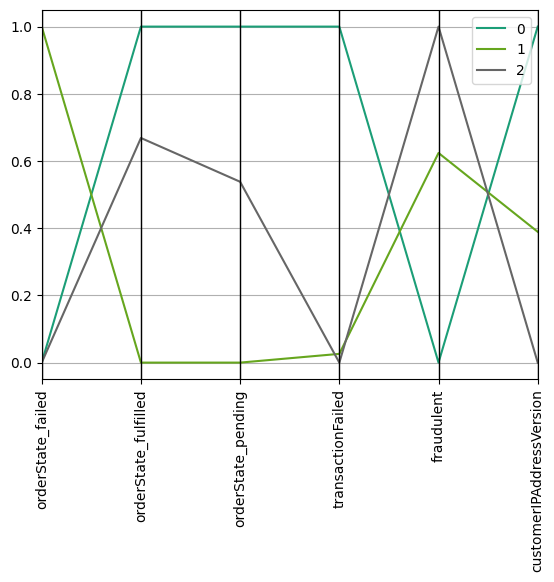

In [37]:
from funpymodeling import coord_plot

d_orig, d_transf = coord_plot(filter_data_cl, cluster_var)

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(filter_data_norm, pred_cl)



0.5116709028439739

## Insigths

1. Los fraudes se concentran en los clusters 1 y 2
2. Los fraudes se concentran en los clientes con IP version 4
3. Los fraudes se concentran en los clientes con ordenes pendientes y completadas
4. Hay un conjunto de posibles fraudes se concentran en los clientes con ordenes fallidas
